# Preface

Nama: Karmenia Ditabaya Lontoh

Batch: HCK-021

Objectives: Saya adalah seorang Data Scientist di sebuah rumah sakit di kota besar, di mana jumlah pasien yang datang setiap hari dengan keluhan nyeri dada sangat tinggi. Tugas saya adalah mengembangkan model Machine Learning untuk memprediksi kemungkinan seseorang mengalami penyakit jantung berdasarkan data pasien. Model ini diharapkan dapat mengoptimalkan waktu dokter spesialis jantung agar dapat lebih fokus pada pasien yang memiliki risiko tinggi, serta meningkatkan efisiensi dalam penanganan pasien di rumah sakit.

# Problem Identification

## SMART Framework

1. **Specific**: Membangun model Machine Learning untuk memprediksi penyakit jantung berdasarkan diagnosis.

2. **Measurable**: Kesuksesan diukur dengan metrik dengan target meminimalkan error prediksi.

3. **Achievable**: Model menggunakan dataset publik dengan 303 entri dan menerapkan algoritma classification yang sesuai.

4. **Relevant**: Prediksi penyakit jantung penting untuk membantu rumah sakit menangani pasien secepat mungkin.

5. **Time-bound**: Pengembangan machine learning akan dilakukan selama kurang lebih 1 minggu.

## Problem Statement

Memprediksi kemungkinan seseorang mengalami penyakit jantung menggunakan model Machine Learning berdasarkan variabel pendukung untuk membantu rumah sakit mengoptimalkan waktu konsultasi kardiolog dengan memprioritaskan pasien yang memiliki kemungkinan lebih tinggi terkena penyakit jantung.

## Problem Breakdown

1. **Hubungan antara Variabel Numerik**
   - Apakah terdapat korelasi signifikan antara usia (`age`) dan detak jantung maksimum (`thalach`)?
   - Bagaimana pengaruh tekanan darah saat istirahat (`trestbps`) terhadap skor angina (`cp`)?
   - Apakah kadar kolesterol (`chol`) berkorelasi dengan nilai oldpeak (`oldpeak`)?
   - Apakah usia berpengaruh terhadap nilai `oldpeak`?
   - Apakah terdapat hubungan antara kadar gula darah puasa (`fbs`) dan tekanan darah saat istirahat (`trestbps`)?

2. **Hubungan antara Variabel Numerik dan Kategorikal**
   - Apakah terdapat perbedaan signifikan dalam rata-rata detak jantung maksimum (`thalach`) antara pasien yang memiliki gejala angina (`exang`) dan yang tidak?
   - Apakah proporsi pasien dengan penyakit jantung (`target`) berbeda antara jenis kelamin (`sex`)?
   - Apakah rata-rata tekanan darah saat istirahat (`trestbps`) berbeda antara pasien yang memiliki penyakit jantung dan yang tidak?
   - Apakah terdapat perbedaan rata-rata kadar kolesterol (`chol`) antara pasien dengan jenis nyeri dada (`cp`) yang berbeda?
   - Apakah ada perbedaan rata-rata nilai `oldpeak` berdasarkan kemiringan segmen ST (`slope`)?

3. **Hubungan antara Variabel Kategorikal**
   - Apakah proporsi pasien yang memiliki penyakit jantung lebih tinggi pada jenis kelamin tertentu (`sex`)?
   - Apakah terdapat lebih banyak pasien dengan gejala angina (`exang`) di antara pasien dengan nilai `thal` yang berbeda?
   - Apakah distribusi tipe nyeri dada (`cp`) berbeda antara pasien dengan penyakit jantung dan tanpa penyakit jantung?
   - Apakah terdapat perbedaan dalam jumlah pembuluh darah yang diwarnai (`ca`) antara pasien dengan gejala angina dan tanpa gejala?
   - Apakah terdapat perbedaan proporsi pasien dengan kadar gula darah puasa (`fbs`) tinggi di antara kategori kemiringan segmen ST (`slope`) yang berbeda?

## Machine Learning Model

Dalam pengembangan machine learning ini, model **classification** digunakan untuk memprediksi ada atau tidaknya penyakit jantung pada pasien. Logistic Regression, KNN, SVC, Decision Tree, and Random Forest.

# Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Data Loading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/heart-attack-possibility.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


| No |  Column  | Description |
|----|:--------|:------------|
| 1  | age      | Age of the patient (in years) |
| 2  | sex      | Sex of the patient |
| 3  | cp       | Chest Pain Type: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic |
| 4  | trestbps | Resting blood pressure (in mm Hg) |
| 5  | chol     | Serum cholestoral (in mg/dl) |
| 6  | fbs      | Fasting blood sugar > 120 mg/dl? 0 = No, 1 = Yes |
| 7  | restecg  | Resting electrocardiographic results: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy |
| 8  | thalach  | Maximum heart rate achieved |
| 9  | exang    | Exercise induced angina: 0 = No, 1 = Yes |
| 10 | oldpeak  | ST depression induced by exercise relative to rest |
| 11 | slope    | The slope of the peak exercise ST segment |
| 12 | ca       | Number of major vessels (0-3) colored by fluoroscopy |
| 13 | thal     | Thallium stress test result: 0 = Normal, 1 = Fixed defect, 2 = Reversible defect |
| 14 | target   | Diagnosis of Heart Disease: 0 = No heart attack, 1 = Yes heart attack |


In [3]:
# Duplicated dataset
df_duplicate = df.copy()

# Exploratory Data Analysis (EDA)

## Data Exploration

### Summary Information

In [4]:
# Menampilkan summary information pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        298 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


Berdasarkan summary information, dapat diketahui bahwa:
1. Terdapat 303 data pasien dengan 14 informasi (kolom) pada setiap pasien.
2. Terdapat missing value pada kolom ca (5 missing values) dan thal (1 missing values).

### Check Unique Value

In [5]:
# Mengecek 20 nilai unik pertama di setiap kolom
unique_values = df.apply(lambda x: x.unique()[:20])

# Menampilkan 20 nilai unik pertama di setiap kolom
for column, values in unique_values.items():
    print(f"'{column}': {values.tolist()}")

'age': [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59, 42, 61, 40]
'sex': ['Male', 'Female']
'cp': [3, 2, 1, 0]
'trestbps': [145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155, 104, 138, 128, 108, 134, 122, 115]
'chol': [233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266, 211, 283, 219, 340, 226, 247, 234]
'fbs': [1, 0]
'restecg': [0, 1, 2]
'thalach': [150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171, 144, 158, 114, 151, 161, 179, 137]
'exang': [0, 1]
'oldpeak': [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 1.8, 1.0, 2.6, 1.5, 3.0, 2.4, 0.1, 1.9]
'slope': ['Downsloping', 'Upsloping', 'Flat']
'ca': [0.0, 2.0, 1.0, 3.0, nan]
'thal': ['Fixed defect', 'Normal', 'Reversible defect', nan]
'target': [1, 0]


Berdasarkan pengecekan unique value, diketahui bahwa pembagian antara data kategorikal dan numerik adalah: 

**Data Kategorikal:**
- **sex**: ['Male', 'Female'] (Jenis kelamin)
- **cp**: [3, 2, 1, 0] (Tipe nyeri dada, kode kategori)
- **fbs**: [1, 0] (Kadar gula darah puasa, 1: > 120 mg/dl, 0: <= 120 mg/dl)
- **restecg**: [0, 1, 2] (Hasil elektrokardiografi, kode kategori)
- **exang**: [0, 1] (Gejala angina yang disebabkan oleh olahraga, 1: Ya, 0: Tidak)
- **slope**: ['Downsloping', 'Upsloping', 'Flat'] (Kemiringan segmen ST selama latihan, kategori)
- **thal**: ['Fixed defect', 'Normal', 'Reversible defect', nan] (Tipe thalassemia, kategori)
- **target**: [1, 0] (Apakah pasien memiliki penyakit jantung atau tidak, target biner)

**Data Numerik:**
- **age**: [63, 37, 41, 56, ...] (Usia pasien)
- **trestbps**: [145, 130, 120, 140, ...] (Tekanan darah saat istirahat)
- **chol**: [233, 250, 204, 236, ...] (Kolesterol serum)
- **thalach**: [150, 187, 172, 178, ...] (Detak jantung maksimum selama latihan)
- **oldpeak**: [2.3, 3.5, 1.4, 0.8, ...] (Depresi ST yang disebabkan oleh olahraga)
- **ca**: [0.0, 2.0, 1.0, 3.0, nan] (Jumlah pembuluh darah utama yang diwarnai dengan fluoroskopi)

### Handling Duplicate Data

In [6]:
# Cek jumlah data yang duplikat
df.duplicated().sum()

1

Ditemukan 1 row duplicate value.

In [7]:
# Hapus data duplikat
df = df.drop_duplicates()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


Duplicate value berhasil dihapus, data menjadi 302 rows.

In [8]:
# Definisikan kolom kategorikal dan numerik
col_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']
col_num = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'oldpeak']

## Function

In [33]:
def cek_outlier(data):
    # Inisialisasi list untuk menyimpan hasil
    column = []
    lower_bound = []
    upper_bound = []
    percent_total_outlier = []
    min_values = []
    max_values = []
    median_values = []
    range_values = []

    for row in range(len(skewness)):
        col = skewness['nama kolom'][row]
        
        # Memeriksa batas atas dan bawah
        if skewness['distribution'][row] == 'skewed':
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)
        else:
            lower_boundary = data[col].mean() - 3 * data[col].std()
            upper_boundary = data[col].mean() + 3 * data[col].std()
        
        # Menambahkan ke dalam daftar
        column.append(col)
        lower_bound.append(lower_boundary)
        upper_bound.append(upper_boundary)
        
        # Menghitung persentase total outlier
        totout = ((len(data[data[col] > upper_boundary]) / len(data) * 100) + 
                   (len(data[data[col] < lower_boundary]) / len(data) * 100))
        percent_total_outlier.append(totout)
        
        # Mengambil nilai min, max, dan median untuk setiap kolom
        min_values.append(round(data[col].min(), 2))  
        max_values.append(round(data[col].max(), 2)) 
        median_values.append(round(data[col].median(), 2))  
        range_values.append(round(data[col].max() - data[col].min(), 2))

    # Membuat DataFrame untuk outlier
    outliers = pd.DataFrame({
        'column': column,
        'upper_boundary': [round(upper, 2) for upper in upper_bound],
        'lower_boundary': [round(lower, 2) for lower in lower_bound],
        'percentage_total_outlier': [round(percent, 2) for percent in percent_total_outlier],
        'min': min_values, 
        'max': max_values,
        'median': median_values, 
        'range': range_values   
    })

    return outliers


In [9]:
def calculate_outliers_and_skewness(column):
    '''
    Fungsi ini digunakan untuk menghitung outliers dan skewness dari suatu kolom.
    
    Parameter:
    column (pd.Series): Kolom data yang ingin dianalisis. Kolom ini harus berupa pd.Series yang berisi data numerik.

    Output:
    tuple: Tiga nilai yang terdiri dari:
        - Jumlah outlier (int): Jumlah nilai yang dianggap outlier dalam kolom.
        - Persentase outlier (float): Persentase dari total nilai yang dianggap outlier.
        - Nilai skewness (float): Ukuran asimetri distribusi data dalam kolom.
    '''
    # Hitung skewness
    skew_value = column.skew()
    
    # Hitung outlier
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    outlier_count = outliers.count()
    total_count = column.count()
    outlier_percentage = (outlier_count / total_count) * 100
    
    return outlier_count, outlier_percentage, skew_value

def plot_distribution(df):
    '''
    Fungsi `plot_distribution` digunakan untuk memplot histogram dan boxplot untuk setiap kolom numerik 
    serta frekuensi untuk kolom kategorikal dalam DataFrame. 
    Fungsi ini akan menghasilkan visualisasi distribusi data.
    
    Parameter:
    df (pd.DataFrame): DataFrame yang berisi data yang ingin dianalisis. 
                       DataFrame ini dapat berisi kolom numerik dan kategorikal.

    Output:
    None: Fungsi ini tidak mengembalikan nilai, tetapi menampilkan visualisasi untuk analisis distribusi.
    '''
    print(f"\n{'====='*40}") 
    print(f"\nAnalisis untuk DataFrame dengan {df.shape[1]} kolom.")
    
    for column in df.columns:
        print(f"\nAnalisis untuk Kolom: '{column}'")
        
        if column in col_num:
            # Hitung outlier dan skewness
            outlier_count, outlier_percentage, skew_value = calculate_outliers_and_skewness(df[column])
            distribusi = 'Normal' if abs(skew_value) < 0.5 else 'Tidak Normal'
            
            # Memplot histogram
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            sns.histplot(df[column], kde=True, bins=30)
            plt.axvline(df[column].mean(), color='r', linestyle='--', label='Mean')
            plt.axvline(df[column].median(), color='g', linestyle='--', label='Median')
            plt.axvline(df[column].mode()[0], color='b', linestyle='--', label='Mode')
            plt.title(f"Distribusi Kolom '{column}' (Skewness = {skew_value:.2f})")
            plt.xlabel(column)
            plt.ylabel('Frekuensi')
            plt.legend()

            # Memplot boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[column])
            plt.title(f"Boxplot Kolom '{column}'")
            plt.xlabel(column)
            
            # Tampilkan informasi outlier
            print(f"Jumlah Outlier: {outlier_count} ({outlier_percentage:.2f}%)")
            
            plt.tight_layout()
            plt.show()
        
        elif column in col_cat:
            # Plot frekuensi untuk kolom kategorikal
            plt.figure(figsize=(10, 5))
            value_counts = df[column].value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values)

            plt.title(f"Frekuensi Kolom '{column}'")
            plt.xlabel(column)
            plt.ylabel('Frekuensi')
            plt.xticks(rotation=45)
            plt.show()

def summary_distribution(df):
    '''
    Fungsi `summary_distribution` digunakan untuk membuat tabel ringkasan distribusi untuk setiap kolom dalam DataFrame.
    
    Parameter:
    df (pd.DataFrame): DataFrame yang berisi data yang ingin dianalisis. 
                       DataFrame ini dapat berisi kolom numerik dan kategorikal.

    Output:
    pd.DataFrame: DataFrame yang berisi ringkasan informasi statistik untuk setiap kolom,
                  termasuk skewness, mean, median, mode, min, max, kurtosis, dan persentase outlier.
    '''
    summary_list = []

    for column in df.columns:
        if column in col_num:
            # Hitung outlier dan skewness
            outlier_count, outlier_percentage, skew_value = calculate_outliers_and_skewness(df[column])
            distribusi = 'Normal' if abs(skew_value) < 0.5 else 'Tidak Normal'
            
            # Menyimpan informasi ke summary_list
            summary_list.append({       
                'Kolom': column,
                'Jenis Data': 'Numerikal',
                'Distribusi': distribusi,
                'Skewness': round(skew_value, 2),
                'Mean': round(df[column].mean(), 2),
                'Median': round(df[column].median(), 2),
                'Mode': round(df[column].mode()[0], 2),
                'Min': round(df[column].min(), 2),
                'Max': round(df[column].max(), 2),
                'Kurtosis': round(df[column].kurtosis(), 2),
                'Persentase Outlier': round(outlier_percentage, 2)
            })
        
        elif column in col_cat:
            # Menyimpan informasi untuk kolom kategorikal
            unique_values = df[column].nunique()
            summary_list.append({
                'Kolom': column,
                'Jenis Data': 'Kategorikal',
                'Distribusi': f"{unique_values} Nilai Unik",
                'Skewness': None,
                'Mean': None,
                'Median': None,
                'Mode': None,
                'Min': None,
                'Max': None,
                'Kurtosis': None,
                'Persentase Outlier': None 
            })

    # Membuat DataFrame ringkasan
    summary_df = pd.DataFrame(summary_list)
    return summary_df


## Check Distribution and Outlier



Analisis untuk DataFrame dengan 14 kolom.

Analisis untuk Kolom: 'age'
Jumlah Outlier: 0 (0.00%)


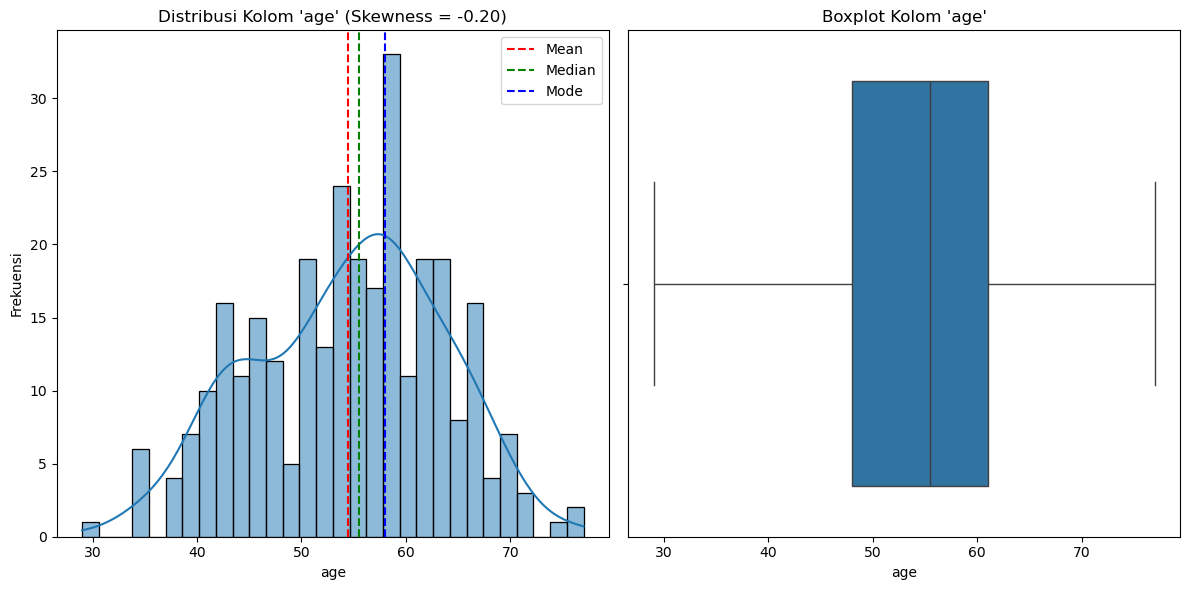


Analisis untuk Kolom: 'sex'


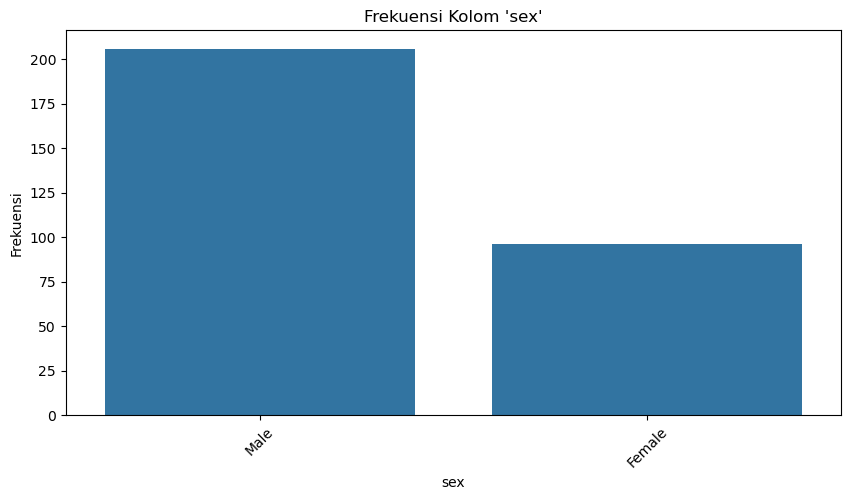


Analisis untuk Kolom: 'cp'


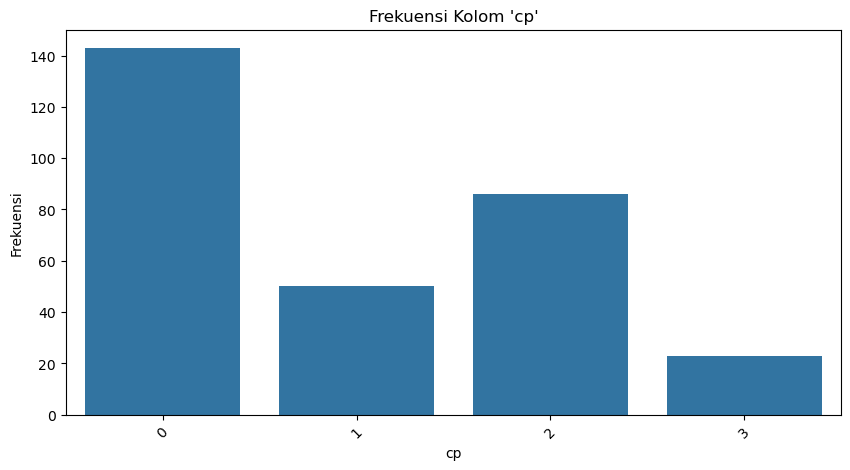


Analisis untuk Kolom: 'trestbps'
Jumlah Outlier: 9 (2.98%)


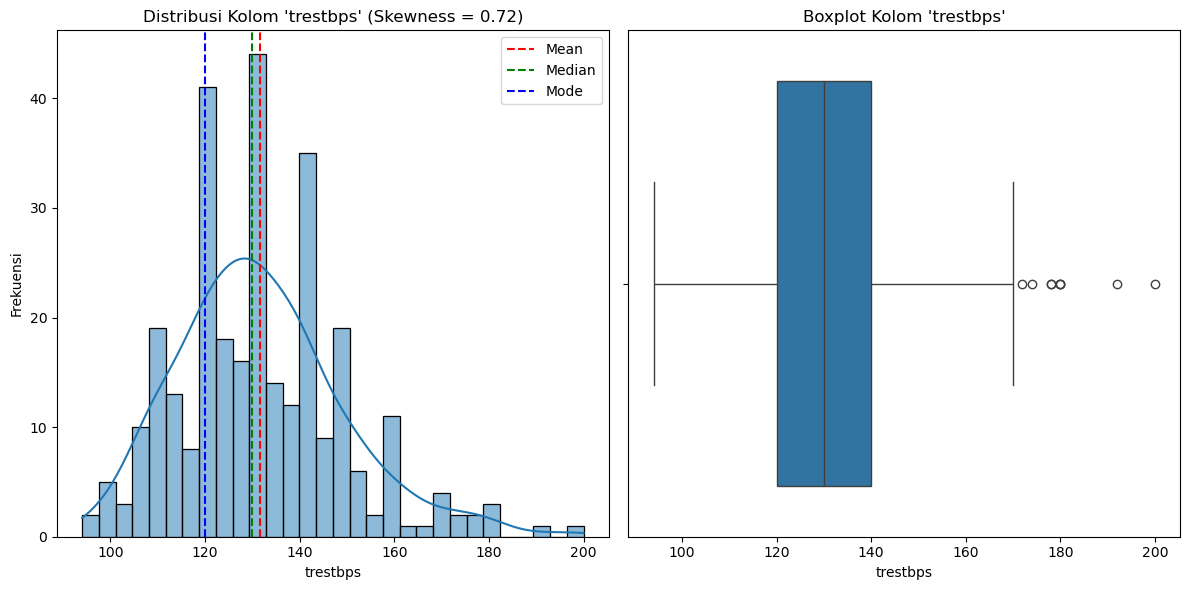


Analisis untuk Kolom: 'chol'
Jumlah Outlier: 5 (1.66%)


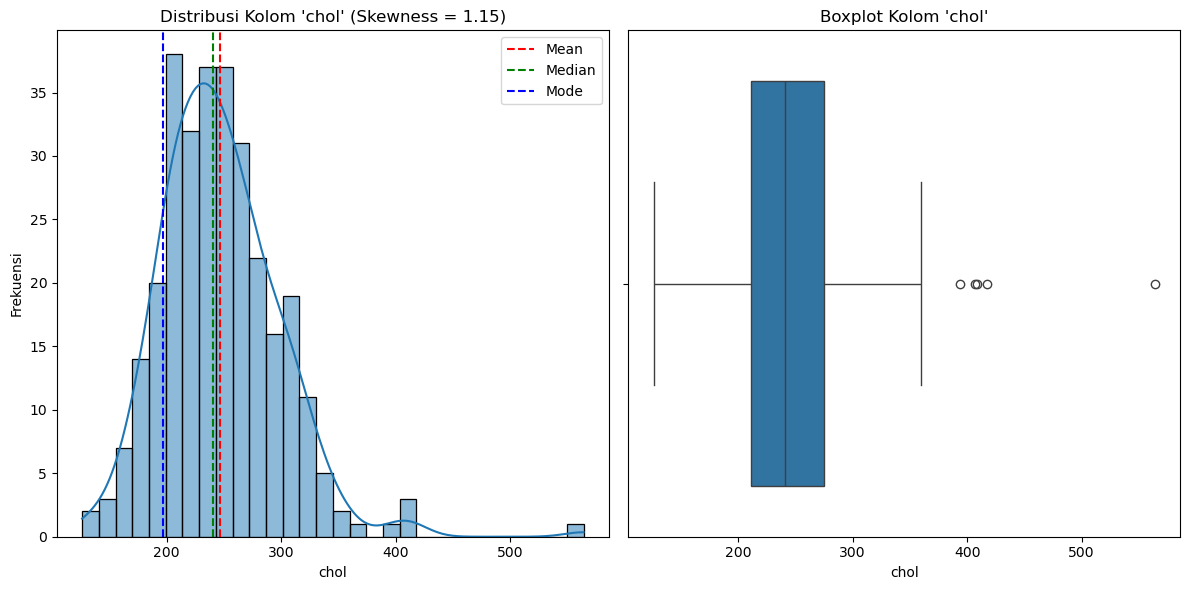


Analisis untuk Kolom: 'fbs'


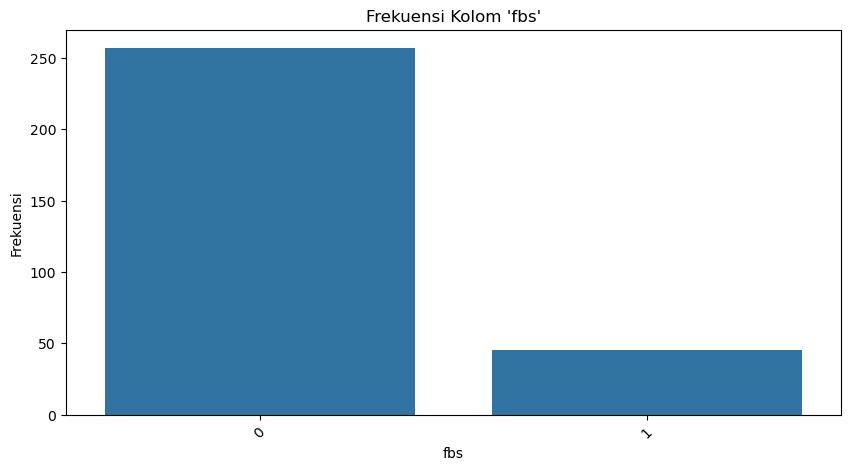


Analisis untuk Kolom: 'restecg'


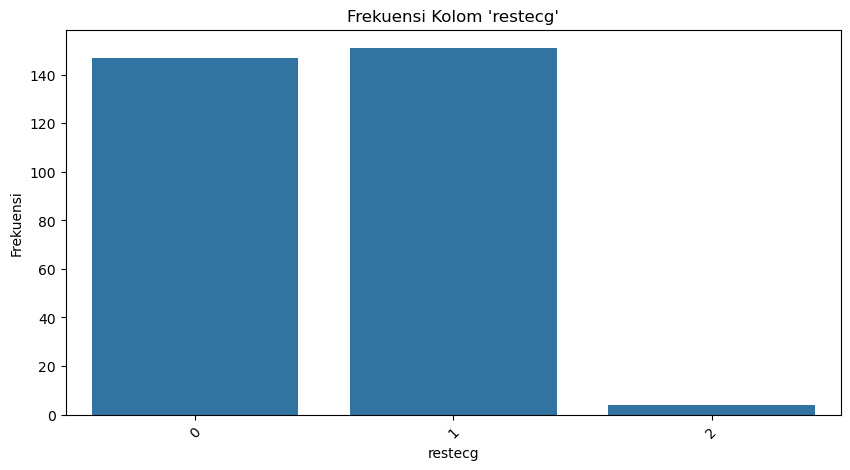


Analisis untuk Kolom: 'thalach'
Jumlah Outlier: 1 (0.33%)


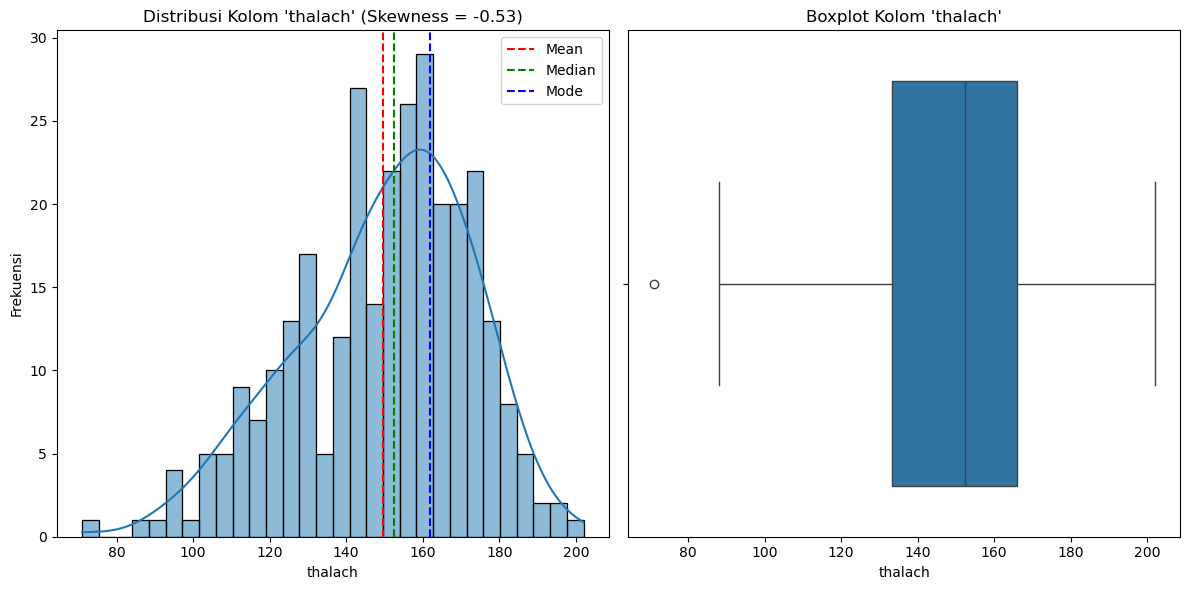


Analisis untuk Kolom: 'exang'


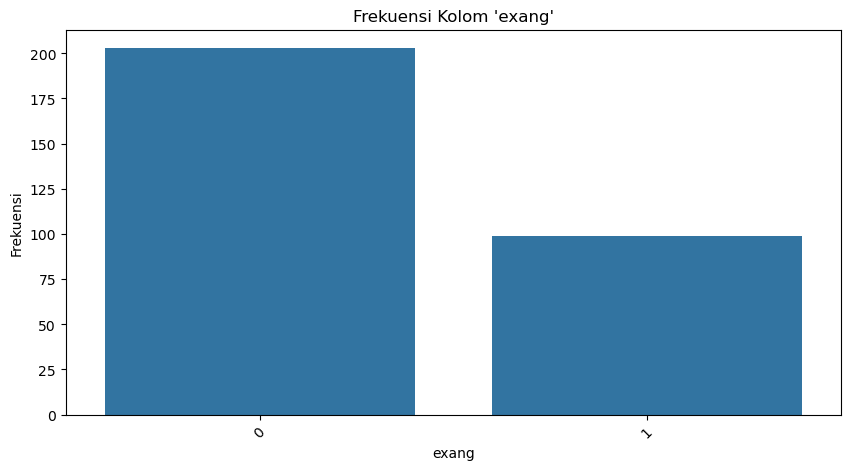


Analisis untuk Kolom: 'oldpeak'
Jumlah Outlier: 5 (1.66%)


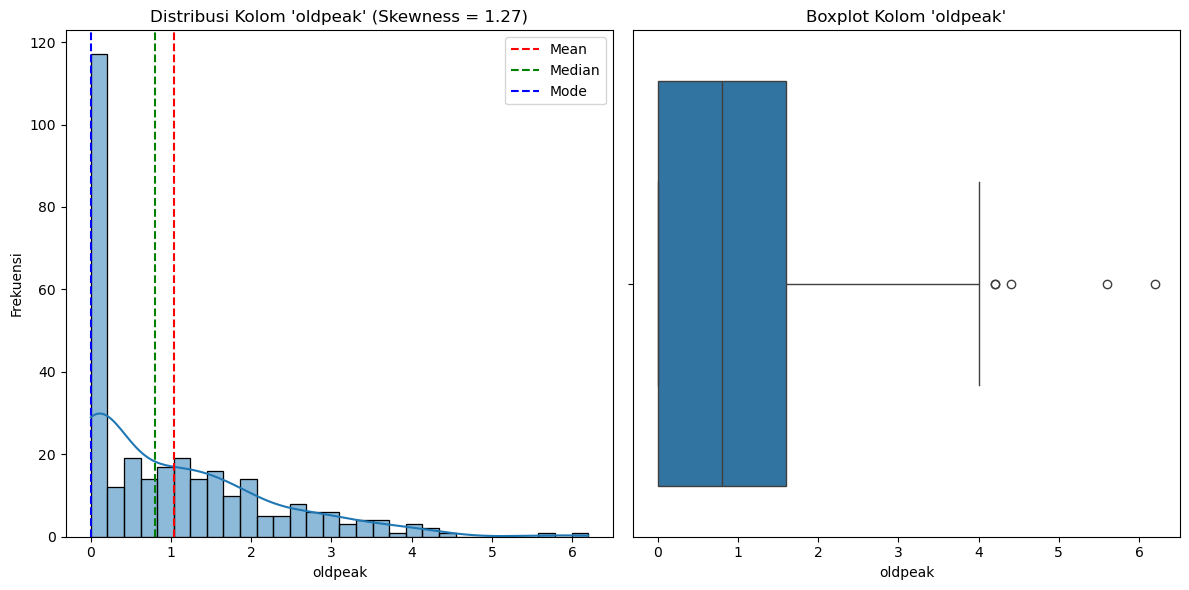


Analisis untuk Kolom: 'slope'


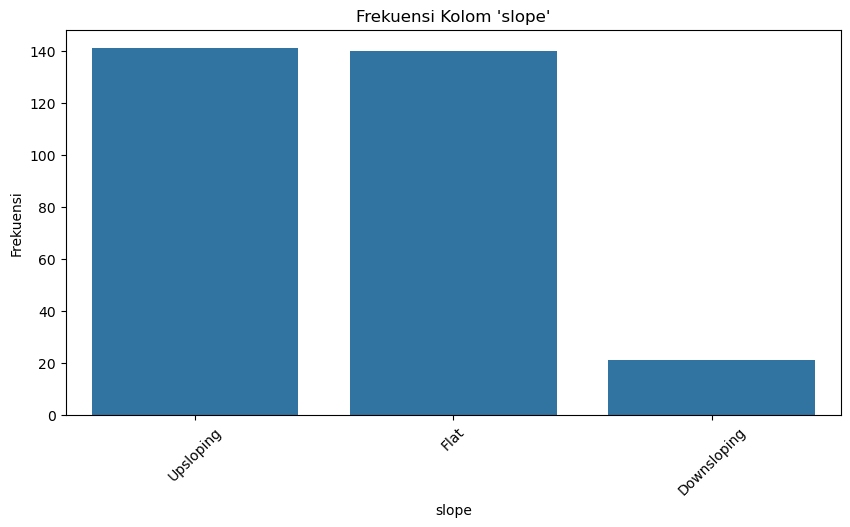


Analisis untuk Kolom: 'ca'
Jumlah Outlier: 20 (6.71%)


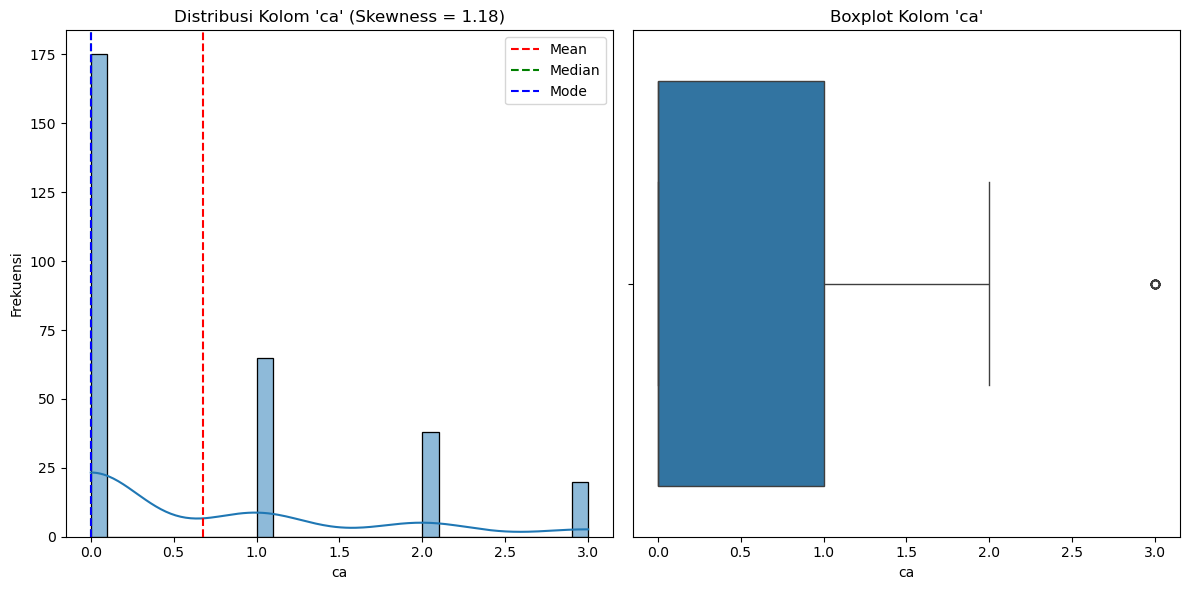


Analisis untuk Kolom: 'thal'


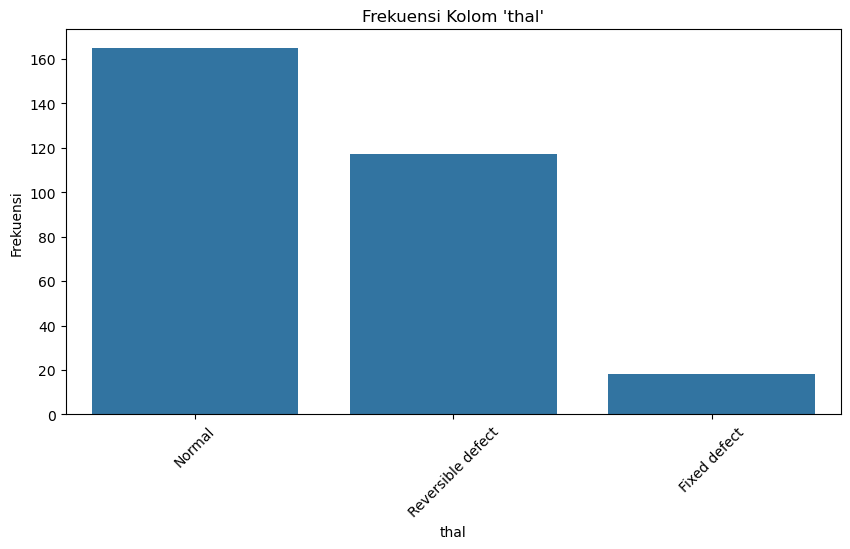


Analisis untuk Kolom: 'target'


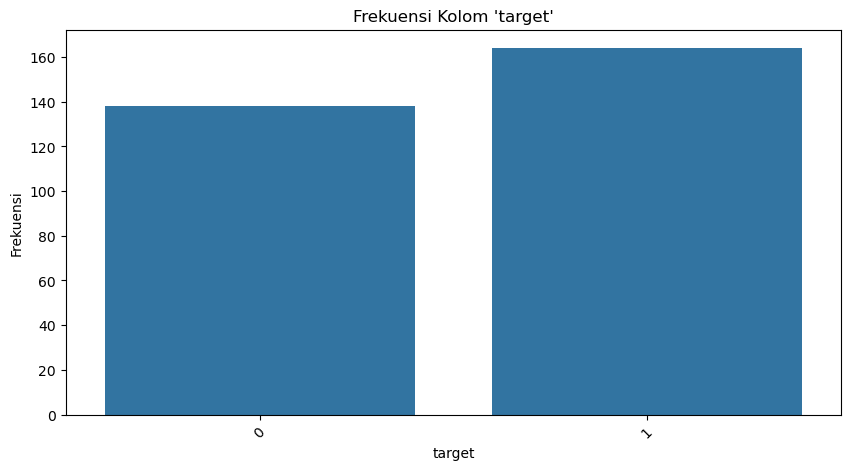

In [10]:
# Memanggil fungsi visualisasi
plot_distribution(df)

In [11]:
summary_distribution(df)

,Kolom,Jenis Data,Distribusi,Skewness,Mean,Median,Mode,Min,Max,Kurtosis,Persentase Outlier
0,age,Numerikal,Normal,-0.20,54.42,55.5,58.0,29.0,77.0,-0.53,0.00
1,sex,Kategorikal,2 Nilai Unik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cp,Kategorikal,4 Nilai Unik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,trestbps,Numerikal,Tidak Normal,0.72,131.60,130.0,120.0,94.0,200.0,0.92,2.98
4,chol,Numerikal,Tidak Normal,1.15,246.50,240.5,197.0,126.0,564.0,4.54,1.66
5,fbs,Kategorikal,2 Nilai Unik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,restecg,Kategorikal,3 Nilai Unik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,thalach,Numerikal,Tidak Normal,-0.53,149.57,152.5,162.0,71.0,202.0,-0.06,0.33
8,exang,Kategorikal,2 Nilai Unik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,oldpeak,Numerikal,Tidak Normal,1.27,1.04,0.8,0.0,0.0,6.2,1.57,1.66


Berdasarkan distribusi data, diketahui bahwa:

1. **Skewness**:
   - Banyak kolom menunjukkan skewness yang signifikan, seperti **logitude** (4.30), **bedrooms** (15.50), dan **price** (29.37), menandakan bahwa data distribusi sangat miring ke kanan (positif).
   - Kolom **age** dan **thalach** menunjukkan skewness negatif, menunjukkan bahwa nilai-nilai lebih banyak berkumpul di sisi kanan distribusi.

2. **Persentase outlier**:
   - Kolom **trestbps**, **chol**, dan **thalach** memiliki outlier dengan masing-masing 2.98%, 1.66%, dan 0.33%, yang perlu ditangani dalam analisis lebih lanjut untuk menghindari bias.

3. **Distribusi normal vs tidak normal**:
   - Kolom **floors** adalah satu-satunya kolom yang menunjukkan distribusi normal (skewness 0.38), sementara sisanya memiliki distribusi tidak normal, yang perlu dipertimbangkan dalam analisis statistik lebih lanjut. Sedangkan untuk kolom **garage** tidak termasuk dalam analisis distribusi normal karena merupakan kolom kategorikal.

Setelah mengetahui distribusi data setiap kolom, maka analisa dapat dilakukan.

## Problem Breakdown

In [12]:
# # Menghitung matriks korelasi
# corr_matrix = df.corr()

# # Membuat heatmap dengan seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
# plt.title('Correlation Heatmap for Categorical Data')
# plt.show()

In [13]:
# Melakukan ANOVA satu arah
anova_result = stats.f_oneway(
    df[df['thal'] == 'Fixed defect']['thalach'],
    df[df['thal'] == 'Normal']['thalach'],
    df[df['thal'] == 'Reversible defect']['thalach']
)

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

F-statistic: 14.912234304731758
P-value: 6.739381021337021e-07


# Feature Engineering

## Handling Cardinality

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect,1
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal,1
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal,1
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal,1
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect,0
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect,0
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect,0
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect,0


In [15]:
# Mengatur lebar kolom maksimum menjadi None untuk meningkatkan visibilitas nilai unik
pd.set_option('display.max_colwidth', None)

# Inisialisasi list kosong untuk menyimpan informasi cardinality
listItem = []

# Melakukan loop melalui setiap kolom kategorikal untuk menghitung cardinality-nya
for col in col_cat:
    listItem.append([col, df[col].nunique(), df[col].unique()])

# Membuat DataFrame untuk menampilkan informasi cardinality dari kolom kategorikal
pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)


,nama kolom,jumlah nilai unique,nilai unique
0,sex,2,"[Male, Female]"
1,cp,4,"[3, 2, 1, 0]"
2,fbs,2,"[1, 0]"
3,restecg,3,"[0, 1, 2]"
4,exang,2,"[0, 1]"
5,slope,3,"[Downsloping, Upsloping, Flat]"
6,thal,3,"[Fixed defect, Normal, Reversible defect, nan]"
7,target,2,"[1, 0]"


## Splitting Features and Target

In [16]:
# Splitting antara X (features) dan y (target)
X = df.drop(['target'], axis = 1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,Male,3,145,233,1,0,150,0,2.3,Downsloping,0.0,Fixed defect
1,37,Male,2,130,250,0,1,187,0,3.5,Downsloping,0.0,Normal
2,41,Female,1,130,204,0,0,172,0,1.4,Upsloping,0.0,Normal
3,56,Male,1,120,236,0,1,178,0,0.8,Upsloping,0.0,Normal
4,57,Female,0,120,354,0,1,163,1,0.6,Upsloping,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,Flat,0.0,Reversible defect
299,45,Male,3,110,264,0,1,132,0,1.2,Flat,0.0,Reversible defect
300,68,Male,0,144,193,1,1,141,0,3.4,Flat,2.0,Reversible defect
301,57,Male,0,130,131,0,1,115,1,1.2,Flat,1.0,Reversible defect


Splitting features dan target berhasil dilakukan.

## Splitting Between Train Set and Test Set

In [17]:
# Splitting training & testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (241, 13)
Test Size (61, 13)


## Handling Missing Value

In [18]:
# Tampilkan hasil untuk memverifikasi
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        1
dtype: int64

In [19]:
# Menampilkan baris yang memiliki nilai NaN di kolom 'thal'
missing_thal_rows = X_train[X_train['thal'].isna()]
missing_thal_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
281,52,Male,0,128,204,1,1,156,1,1.0,Flat,0.0,NaN


In [20]:
# Mengisi missing values
X_train['ca'] = X_train['ca'].fillna(X_train['ca'].median())  # Mengisi dengan median
X_train['thal'] = X_train['thal'].fillna(X_train['thal'].mode()[0])  # Mengisi dengan median

In [21]:
# Tampilkan hasil untuk memverifikasi
X_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## Split Between Numeric Columns and Categorical Columns

In [22]:
# Definisikan kolom kategorikal dan numerik
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'oldpeak']

# Membagi DataFrame menjadi DataFrame kategorikal dan numerikal
df_num = df[num_columns]
df_cat = df[cat_columns]

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['age', 'trestbps', 'chol', 'thalach', 'ca', 'oldpeak']
Categorical Columns :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [23]:
# Split numerical and categorical columns

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,trestbps,chol,thalach,ca,oldpeak
223,56,200,288,133,2.0,4.0
31,65,120,177,140,0.0,0.4
161,55,132,342,166,0.0,1.2
47,47,138,257,156,0.0,0.0
92,52,138,223,169,0.0,0.0
...,...,...,...,...,...,...
260,66,178,228,165,2.0,1.0
130,54,160,201,163,1.0,0.0
242,64,145,212,132,2.0,2.0
254,59,160,273,125,0.0,0.0


In [24]:
X_train_cat

,sex,cp,fbs,restecg,exang,slope,thal
223,Female,0,1,0,1,Downsloping,Reversible defect
31,Male,0,0,1,0,Upsloping,Reversible defect
161,Female,1,0,1,0,Upsloping,Normal
47,Male,2,0,0,0,Upsloping,Normal
92,Male,2,0,1,0,Upsloping,Normal
...,...,...,...,...,...,...,...
260,Female,0,1,1,1,Flat,Reversible defect
130,Female,2,0,1,0,Upsloping,Normal
242,Male,0,0,0,0,Flat,Fixed defect
254,Male,3,0,0,0,Upsloping,Normal


## Handling Outlier

### Outlier Detection

In [25]:
listItem= []

for col in num_columns:
  listItem.append([col, round(X_train_num[col].skew(),1), np.where(
    (round(X_train_num[col].skew(),1) <= 0.5) & (round(X_train_num[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])

skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,age,-0.2,normal
1,trestbps,0.7,skewed
2,chol,1.3,skewed
3,thalach,-0.6,skewed
4,ca,1.2,skewed
5,oldpeak,1.4,skewed


In [26]:
cek_outlier(X_train_num)

,column,upper_boundary,lower_boundary,percentage_total_outlier,min,max,median,range
0,age,81.81,26.54,0.00,29.0,77.0,55.0,48.0
1,trestbps,200.00,60.00,0.00,94.0,200.0,130.0,106.0
2,chol,467.00,19.00,0.41,141.0,564.0,240.0,423.0
3,thalach,249.00,53.00,0.00,71.0,202.0,154.0,131.0
4,ca,4.00,-3.00,0.00,0.0,3.0,0.0,3.0
5,oldpeak,6.40,-4.80,0.00,0.0,6.2,0.6,6.2


Berdasarkan hasil pengecekan outlier pada kolom-kolom di dataset, berikut adalah analisis khusus untuk kolom yang memiliki outlier:

 Tabel Penanganan Outlier

| Column      | Upper Boundary | Lower Boundary | Min   | Max   | Outlier % | Action   | Keterangan                                                                                   |
|-------------|----------------|----------------|-------|-------|-----------|----------|----------------------------------------------------------------------------------------------|
| chol        | 467.00         | 19.00          | 141.0 | 564.0 | 0.41%     | Capping  | Terdapat outlier pada nilai maksimum yang jauh di atas batas atas, perlu pembatasan nilai. |
| oldpeak     | 6.40           | -4.80          | 0.0   | 6.2   | 0.00%     | -        | Nilai maksimum masih dalam batas wajar, tidak perlu tindakan lebih lanjut.                   |

 Kesimpulan:
- **Capping**: Kolom **chol** memiliki outlier yang signifikan dengan nilai maksimum 564, melebihi batas atas yang wajar (467). Diperlukan tindakan capping untuk membatasi nilai tersebut agar tidak mempengaruhi analisis lebih lanjut.
  
- **Nilai konsisten**: Kolom **oldpeak** menunjukkan bahwa nilai maksimum masih dalam rentang yang wajar. Persentase outlier adalah 0.00%, sehingga tidak perlu tindakan lebih lanjut.

 Saran Tindakan Lanjutan:
- Lakukan capping pada kolom **chol** dengan batas atas yang ditetapkan untuk menghindari distorsi dalam analisis statistik selanjutnya.
- Pastikan untuk memeriksa kolom lain secara berkala untuk potensi outlier yang tidak terdeteksi dalam analisis ini.

### Capping

In [27]:
!pip install feature_engine==1.6.2

pake iqr karna skewed

In [28]:
from feature_engine.outliers import Winsorizer

# Menginisialisasi Winsorizer untuk variabel yang dipilih
winsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=3,
                         variables=['chol'],
                         missing_values='ignore')

X_train_num_capped = winsoriser.fit_transform(X_train_num)
X_test_num_capped = winsoriser.transform(X_test_num)

chol - Before Capping


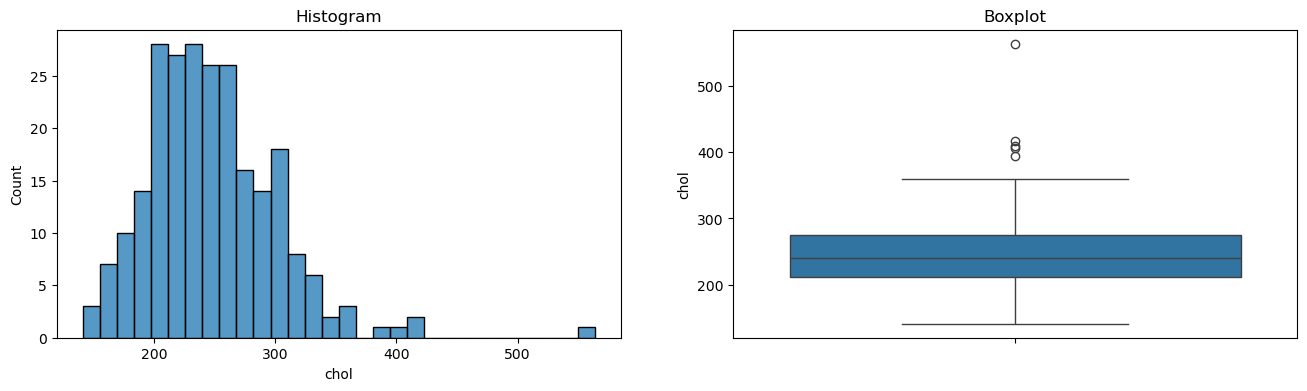


chol - After Capping


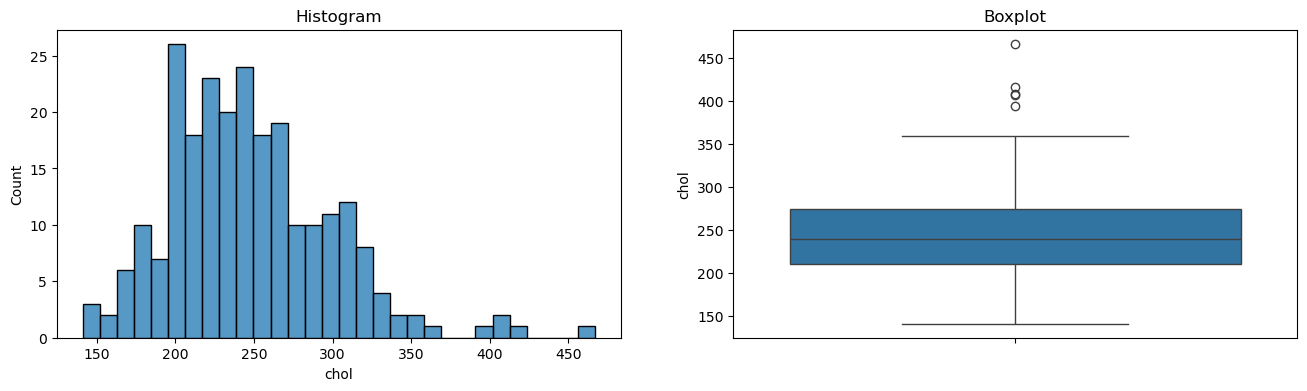

In [29]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Define columns to check
cols_to_check = ['chol']

# Check the distribution before and after capping
for col in cols_to_check:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_num_capped, col)

In [34]:
cek_outlier(X_train_num_capped)

,column,upper_boundary,lower_boundary,percentage_total_outlier,min,max,median,range
0,age,81.81,26.54,0.0,29.0,77.0,55.0,48.0
1,trestbps,200.00,60.00,0.0,94.0,200.0,130.0,106.0
2,chol,467.00,19.00,0.0,141.0,467.0,240.0,326.0
3,thalach,249.00,53.00,0.0,71.0,202.0,154.0,131.0
4,ca,4.00,-3.00,0.0,0.0,3.0,0.0,3.0
5,oldpeak,6.40,-4.80,0.0,0.0,6.2,0.6,6.2


## Feature Selection

In [35]:
# Menampatkan numerical and categorical columns yang sudah fix

num_columns = X_train_num_capped.columns.tolist()
cat_columns = X_train_cat.columns.tolist()

print('Num columns : ', num_columns)
print('Cat columns : ', cat_columns)

Num columns :  ['age', 'trestbps', 'chol', 'thalach', 'ca', 'oldpeak']
Cat columns :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


### Categorical Data

In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# Initialize results storage
results = []
p_values = []
interpretasi = []
cols = []

# Loop through each categorical feature
for col in X_train_cat.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(X_train_cat[col], y_train)

    # Perform chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    p_values.append(p_value)
    cols.append(col)
    
    # Interpretation based on p-value
    interpretation = 'ada korelasi' if p_value < 0.05 else 'tidak ada korelasi'
    interpretasi.append(interpretation)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'nama kolom': cols,
    'p_value': p_values,
    'hasil': interpretasi
})

# Display the results
results_df


,nama kolom,p_value,hasil
0,sex,4.949772e-05,ada korelasi
1,cp,1.256560e-10,ada korelasi
2,fbs,5.045215e-01,tidak ada korelasi
3,restecg,4.075055e-03,ada korelasi
4,exang,6.369609e-11,ada korelasi
5,slope,4.449490e-08,ada korelasi
6,thal,3.389246e-14,ada korelasi


In [43]:
# Dropping 'fbs' columns from the DataFrame
X_train_cat_selected = X_train_cat.drop(['fbs'], axis = 1)
X_test_cat_selected = X_test_cat.drop(['fbs'], axis = 1)
X_train_cat_selected

,sex,cp,restecg,exang,slope,thal
223,Female,0,0,1,Downsloping,Reversible defect
31,Male,0,1,0,Upsloping,Reversible defect
161,Female,1,1,0,Upsloping,Normal
47,Male,2,0,0,Upsloping,Normal
92,Male,2,1,0,Upsloping,Normal
...,...,...,...,...,...,...
260,Female,0,1,1,Flat,Reversible defect
130,Female,2,1,0,Upsloping,Normal
242,Male,0,0,0,Flat,Fixed defect
254,Male,3,0,0,Upsloping,Normal


### Numerical Data

In [41]:
import pandas as pd
from scipy.stats import f_oneway

# Initialize results storage
p_values = []
interpretasi = []
cols = []

# Loop through each numerical feature
for col in X_train_num_capped.columns:
    # Group the data by the categorical target variable
    groups = [X_train_num_capped[col][y_train == category] for category in y_train.unique()]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)

    # Append results
    p_values.append(p_value)
    cols.append(col)

    # Interpret the p-value
    if p_value < 0.05:
        interpretasi.append('ada korelasi')
    else:
        interpretasi.append('ga ada korelasi')

# Create a DataFrame for results
results_df = pd.DataFrame({
    'nama kolom': cols,
    'hasil': interpretasi
})

# Display the results
results_df


,nama kolom,hasil
0,age,ada korelasi
1,trestbps,ada korelasi
2,chol,ga ada korelasi
3,thalach,ada korelasi
4,ca,ada korelasi
5,oldpeak,ada korelasi


In [42]:
# Dropping 'chol' columns from the DataFrame
X_train_cat_selected = X_train_num_capped.drop(['chol'], axis = 1)
X_test_cat_selected = X_test_num_capped.drop(['chol'], axis = 1)
X_train_cat_selected

,age,trestbps,thalach,ca,oldpeak
223,56,200,133,2.0,4.0
31,65,120,140,0.0,0.4
161,55,132,166,0.0,1.2
47,47,138,156,0.0,0.0
92,52,138,169,0.0,0.0
...,...,...,...,...,...
260,66,178,165,2.0,1.0
130,54,160,163,1.0,0.0
242,64,145,132,2.0,2.0
254,59,160,125,0.0,0.0


## Feature Scaling and Encoding (Pipeline)

In [48]:
# Create A Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])
preprocessing_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach', 'ca',
                                  'oldpeak']),
                                ('pipe_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'thal'])])

# Model Definition

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



In [50]:
# Logistic Regression Pipeline
logreg_pipeline = make_pipeline(preprocessing_pipeline, LogisticRegression())

# KNN Pipeline
knn_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

# SVC Pipeline
svc_pipeline = make_pipeline(preprocessing_pipeline, SVC())

# Decision Tree Pipeline
dt_pipeline = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

# Random Forest Pipeline
rf_pipeline = make_pipeline(preprocessing_pipeline, RandomForestClassifier())


# Model Training

Logistic Regression, KNN, SVC, Decision Tree, and Random Forest.

In [52]:
# Fit Logistic Regression
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'ca',
                                                   'oldpeak']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('logisticregression', LogisticRegression())])

In [53]:
# Fit KNN
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'ca',
                                                   'oldpeak']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [54]:
# Fit SVC
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'ca',
                                                   'oldpeak']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('svc', SVC())])

In [55]:
# Fit Decision Tree
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'ca',
                                                   'oldpeak']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [56]:
# Fit Random Forest
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'ca',
                                                   'oldpeak']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('randomforestclassifier', RandomForestClassifier())])

# Baseline

In [67]:
from sklearn.metrics import recall_score, classification_report

In [69]:
# Logistic Regression Baseline
logreg_pipeline.fit(X_train, y_train)
y_pred_train_logreg = logreg_pipeline.predict(X_train)
y_pred_test_logreg = logreg_pipeline.predict(X_test)

logreg_baseline_report = {
    'train_recall': recall_score(y_train, y_pred_train_logreg),
    'test_recall': recall_score(y_test, y_pred_test_logreg)
}

print('Logistic Regression - Baseline Recall:', logreg_baseline_report)
print('\nLogistic Regression - Classification Report for Train Set:\n', classification_report(y_train, y_pred_train_logreg))
print('Logistic Regression - Classification Report for Test Set:\n', classification_report(y_test, y_pred_test_logreg))


Logistic Regression - Baseline Recall: {'train_recall': 0.8947368421052632, 'test_recall': 0.8709677419354839}

Logistic Regression - Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       108
           1       0.85      0.89      0.87       133

    accuracy                           0.85       241
   macro avg       0.86      0.85      0.85       241
weighted avg       0.86      0.85      0.85       241

Logistic Regression - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [70]:
# KNN Baseline
knn_pipeline.fit(X_train, y_train)
y_pred_train_knn = knn_pipeline.predict(X_train)
y_pred_test_knn = knn_pipeline.predict(X_test)

knn_baseline_report = {
    'train_recall': recall_score(y_train, y_pred_train_knn),
    'test_recall': recall_score(y_test, y_pred_test_knn)
}

print('KNN - Baseline Recall:', knn_baseline_report)
print('KNN - Classification Report for Train Set:\n', classification_report(y_train, y_pred_train_knn))
print('KNN - Classification Report for Test Set:\n', classification_report(y_test, y_pred_test_knn))


KNN - Baseline Recall: {'train_recall': 0.8796992481203008, 'test_recall': 0.8709677419354839}
KNN - Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       108
           1       0.84      0.88      0.86       133

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241

KNN - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.93      0.87      0.90        31

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [71]:
# SVC Baseline
svc_pipeline.fit(X_train, y_train)
y_pred_train_svc = svc_pipeline.predict(X_train)
y_pred_test_svc = svc_pipeline.predict(X_test)

svc_baseline_report = {
    'train_recall': recall_score(y_train, y_pred_train_svc),
    'test_recall': recall_score(y_test, y_pred_test_svc)
}

print('SVC - Baseline Recall:', svc_baseline_report)
print('SVC - Classification Report for Train Set:\n', classification_report(y_train, y_pred_train_svc))
print('SVC - Classification Report for Test Set:\n', classification_report(y_test, y_pred_test_svc))


SVC - Baseline Recall: {'train_recall': 0.9022556390977443, 'test_recall': 0.8709677419354839}
SVC - Classification Report for Train Set:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       108
           1       0.87      0.90      0.89       133

    accuracy                           0.87       241
   macro avg       0.87      0.87      0.87       241
weighted avg       0.87      0.87      0.87       241

SVC - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [72]:
# Decision Tree Baseline
dt_pipeline.fit(X_train, y_train)
y_pred_train_dt = dt_pipeline.predict(X_train)
y_pred_test_dt = dt_pipeline.predict(X_test)

dt_baseline_report = {
    'train_recall': recall_score(y_train, y_pred_train_dt),
    'test_recall': recall_score(y_test, y_pred_test_dt)
}

print('Decision Tree - Baseline Recall:', dt_baseline_report)
print('Decision Tree - Classification Report for Train Set:\n', classification_report(y_train, y_pred_train_dt))
print('Decision Tree - Classification Report for Test Set:\n', classification_report(y_test, y_pred_test_dt))


Decision Tree - Baseline Recall: {'train_recall': 1.0, 'test_recall': 0.5806451612903226}
Decision Tree - Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       133

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Decision Tree - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72        30
           1       0.75      0.58      0.65        31

    accuracy                           0.69        61
   macro avg       0.70      0.69      0.69        61
weighted avg       0.70      0.69      0.68        61



In [73]:
# Random Forest Baseline
rf_pipeline.fit(X_train, y_train)
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

rf_baseline_report = {
    'train_recall': recall_score(y_train, y_pred_train_rf),
    'test_recall': recall_score(y_test, y_pred_test_rf)
}

print('Random Forest - Baseline Recall:', rf_baseline_report)
print('Random Forest - Classification Report for Train Set:\n', classification_report(y_train, y_pred_train_rf))
print('Random Forest - Classification Report for Test Set:\n', classification_report(y_test, y_pred_test_rf))


Random Forest - Baseline Recall: {'train_recall': 1.0, 'test_recall': 0.8064516129032258}
Random Forest - Classification Report for Train Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       133

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Random Forest - Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.83      0.81      0.82        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



# Cross Validation

In [62]:
# Function to perform cross-validation and print results
def cross_validate_model(model, X, y, cv=3):
    recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall')
    print(f'Recall - All - Cross Validation  : {recall_scores}')
    print(f'Recall - Mean - Cross Validation : {recall_scores.mean()}')
    print(f'Recall - Std - Cross Validation  : {recall_scores.std()}')
    print(f'Recall - Range of Test-Set       : {recall_scores.mean() - recall_scores.std()} - {recall_scores.mean() + recall_scores.std()}')
    print('-' * 50)

In [64]:
# Apply cross-validation to each model
print("Logistic Regression:")
cross_validate_model(logreg_pipeline, X_train, y_train)  # Pass the raw training data

print("KNN:")
cross_validate_model(knn_pipeline, X_train, y_train)

print("SVC:")
cross_validate_model(svc_pipeline, X_train, y_train)

print("Decision Tree:")
cross_validate_model(dt_pipeline, X_train, y_train)

print("Random Forest:")
cross_validate_model(rf_pipeline, X_train, y_train)

Logistic Regression:
Recall - All - Cross Validation  : [0.8        0.86363636 0.90909091]
Recall - Mean - Cross Validation : 0.8575757575757575
Recall - Std - Cross Validation  : 0.0447418880613133
Recall - Range of Test-Set       : 0.8128338695144443 - 0.9023176456370708
--------------------------------------------------
KNN:
Recall - All - Cross Validation  : [0.77777778 0.84090909 0.84090909]
Recall - Mean - Cross Validation : 0.81986531986532
Recall - Std - Cross Validation  : 0.02976038641357524
Recall - Range of Test-Set       : 0.7901049334517447 - 0.8496257062788952
--------------------------------------------------
SVC:
Recall - All - Cross Validation  : [0.75555556 0.84090909 0.86363636]
Recall - Mean - Cross Validation : 0.82003367003367
Recall - Std - Cross Validation  : 0.04652743037818006
Recall - Range of Test-Set       : 0.7735062396554899 - 0.8665611004118501
--------------------------------------------------
Decision Tree:
Recall - All - Cross Validation  : [0.733333

In [87]:
# Save Classification Report into a Dictionary

all_reports = {}

def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, train_cv_score, name):
    score_reports = {
        'train_recall': recall_score(y_train, y_pred_train),
        'train_cv_recall': train_cv_score.mean(),
        'test_recall': recall_score(y_test, y_pred_test),
    }
    all_reports[name] = score_reports
    return all_reports

In [90]:
# Logistic Regression Baseline
logreg_pipeline.fit(X_train, y_train)
y_pred_train_logreg = logreg_pipeline.predict(X_train)
y_pred_test_logreg = logreg_pipeline.predict(X_test)
logreg_cv_recall = cross_val_score(logreg_pipeline, X_train, y_train, cv=3, scoring='recall')
all_reports = performance_report(all_reports, y_train, y_pred_train_logreg, y_test, y_pred_test_logreg, logreg_cv_recall, 'Logistic Regression Baseline')


# KNN Baseline
knn_pipeline.fit(X_train, y_train)
y_pred_train_knn = knn_pipeline.predict(X_train)
y_pred_test_knn = knn_pipeline.predict(X_test)
knn_cv_recall = cross_val_score(knn_pipeline, X_train, y_train, cv=3, scoring='recall')
all_reports = performance_report(all_reports, y_train, y_pred_train_knn, y_test, y_pred_test_knn, knn_cv_recall, 'KNN Baseline')

# SVC Baseline
svc_pipeline.fit(X_train, y_train)
y_pred_train_svc = svc_pipeline.predict(X_train)
y_pred_test_svc = svc_pipeline.predict(X_test)
svc_cv_recall = cross_val_score(svc_pipeline, X_train, y_train, cv=3, scoring='recall')
all_reports = performance_report(all_reports, y_train, y_pred_train_svc, y_test, y_pred_test_svc, svc_cv_recall, 'SVC Baseline')

# Decision Tree Baseline
dt_pipeline.fit(X_train, y_train)
y_pred_train_dt = dt_pipeline.predict(X_train)
y_pred_test_dt = dt_pipeline.predict(X_test)
dt_cv_recall = cross_val_score(dt_pipeline, X_train, y_train, cv=3, scoring='recall')
all_reports = performance_report(all_reports, y_train, y_pred_train_dt, y_test, y_pred_test_dt, dt_cv_recall, 'Decision Tree Baseline')

# Random Forest Baseline
rf_pipeline.fit(X_train, y_train)
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)
rf_cv_recall = cross_val_score(rf_pipeline, X_train, y_train, cv=3, scoring='recall')
all_reports = performance_report(all_reports, y_train, y_pred_train_rf, y_test, y_pred_test_rf, rf_cv_recall, 'Random Forest Baseline')

# Display Results
pd.DataFrame(all_reports)

,Logistic Regression Baseline,KNN Baseline,SVC Baseline,Decision Tree Baseline,Random Forest Baseline
train_recall,0.894737,0.879699,0.902256,1.000000,1.000000
train_cv_recall,0.857576,0.819865,0.820034,0.752189,0.835017
test_recall,0.870968,0.870968,0.870968,0.580645,0.806452


# Model Evaluation

# Model Saving

# Model Inference

# Conclusion